In [3]:
import torch

from diffusers import StableDiffusionPipeline



WARNING[XFORMERS]: xFormers can't load C++/CUDA extensions. xFormers was built for:
    PyTorch 2.0.1+cu118 with CUDA 1108 (you have 1.13.1)
    Python  3.10.12 (you have 3.10.12)
  Please reinstall xformers (see https://github.com/facebookresearch/xformers#installing-xformers)
  Memory-efficient attention, SwiGLU, sparse and more won't be available.
  Set XFORMERS_MORE_DETAILS=1 for more details


In [4]:
pipe = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16)
pipe = pipe.to("cuda")

prompt='a frog'

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


  0%|          | 0/50 [00:00<?, ?it/s]

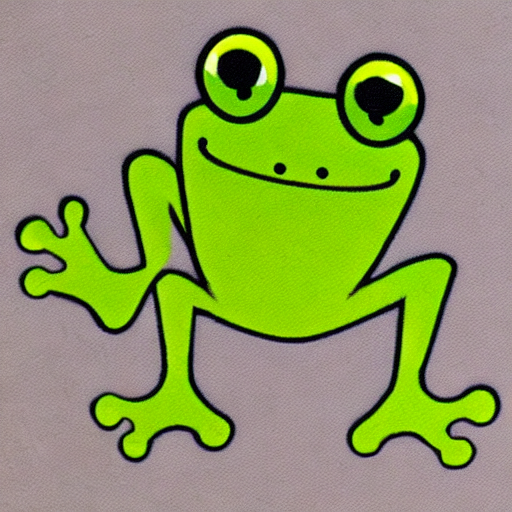

In [5]:
image = pipe(prompt).images[0]
image

## LoRA

In [6]:
path2weights='../cjgg_frog_sdv15.safetensors'

In [7]:
pipe.load_lora_weights(path2weights, local_files_only=True)

  0%|          | 0/50 [00:00<?, ?it/s]

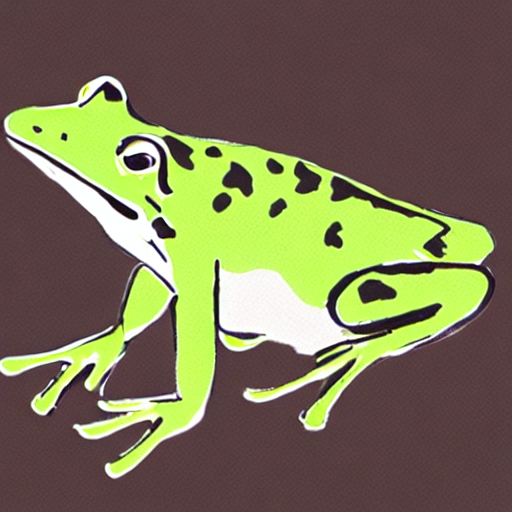

In [8]:
# Scale = 0.1
prompt='a frog'
image = pipe(prompt, cross_attention_kwargs={"scale": 0.1}).images[0]
image

  0%|          | 0/50 [00:00<?, ?it/s]

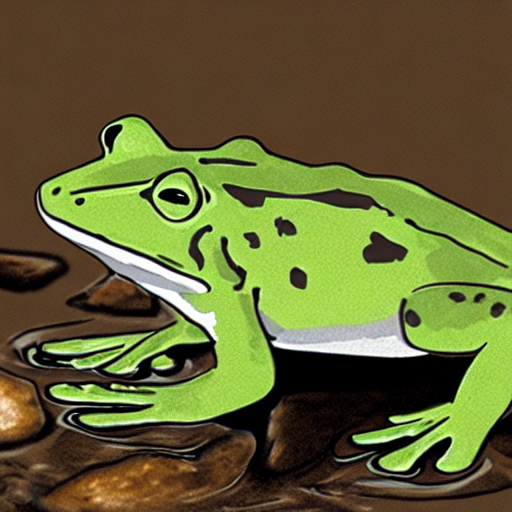

In [9]:
# scale = 0.5 

# Scale = 0.1
prompt='a frog'
image = pipe(prompt, cross_attention_kwargs={"scale": 0.5}).images[0]
image

  0%|          | 0/50 [00:00<?, ?it/s]

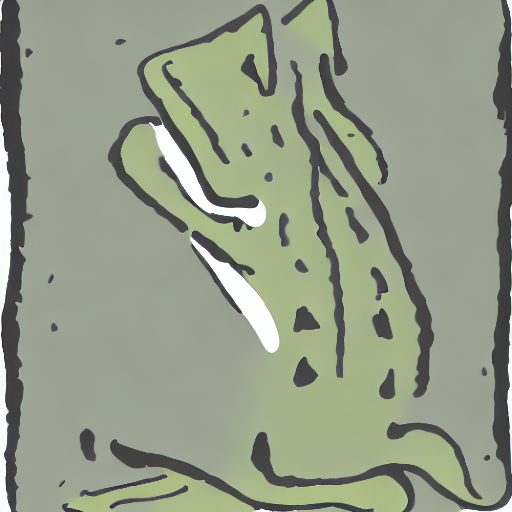

In [14]:
# Scale = 1
prompt='a frog'
image = pipe(prompt, cross_attention_kwargs={"scale": 3}).images[0]
image

  0%|          | 0/50 [00:00<?, ?it/s]

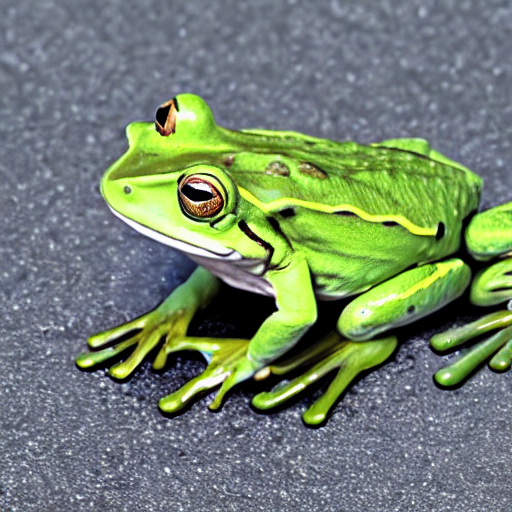

In [11]:
# Scale = -0.5
prompt='a frog'
image = pipe(prompt, cross_attention_kwargs={"scale": -0.5}).images[0]
image

  0%|          | 0/50 [00:00<?, ?it/s]

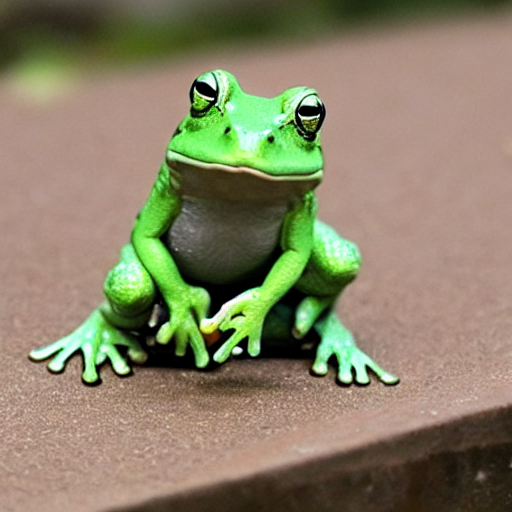

In [12]:
# Scale = -1
prompt='a frog'
image = pipe(prompt, cross_attention_kwargs={"scale": -1}).images[0]
image

In [15]:
path2weights='../../Dwayne_Douglas_Johnson.safetensors'

In [16]:
pipe.load_lora_weights(path2weights, local_files_only=True)

  0%|          | 0/50 [00:00<?, ?it/s]

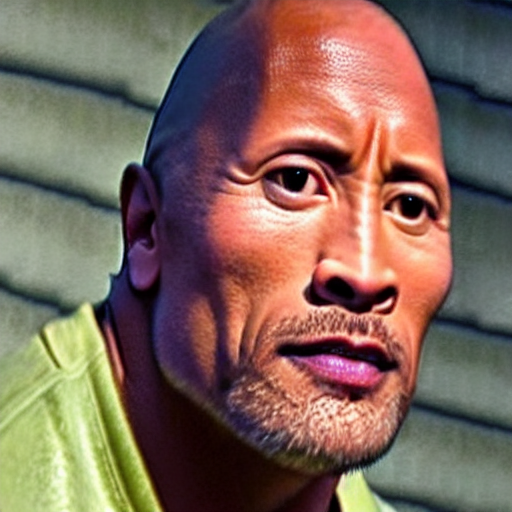

In [23]:
# scale = 1

prompt='Dwayne_Douglas_Johnson, 1man,male, 8k, close up, detailed face'
image = pipe(prompt, cross_attention_kwargs={"scale": 1}).images[0]
image

In [22]:
pipe.safety_checker=None